In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from src.data_splitting import *
from src.models import *
from src.preprocessing import *
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

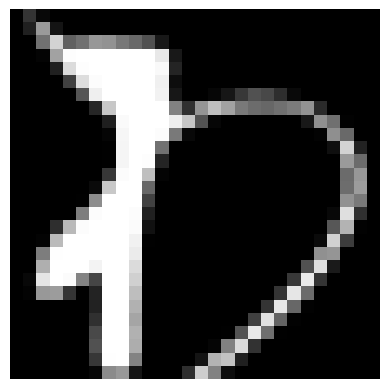

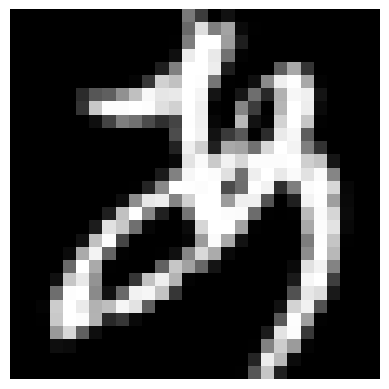

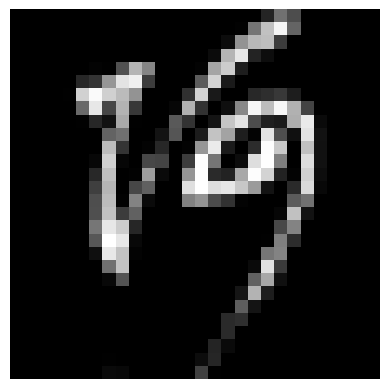

(5000, 784)


In [2]:
X = np.load ("data/X_images.npy")
Y = np.load ("data/y_images.npy")
# X = X / 255
# Y = Y / 255
img1 = X[0].reshape(28 ,28)
img2 = X[1].reshape(28 ,28)
img3 = X[2].reshape(28 ,28)

# Display the image
plt.imshow(img1, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img3, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

print(X.shape)

## Data Splitting

In [3]:
X_norm = X / 255
# Y_encoded = one_hot_encode(Y, 49)
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X_norm,Y)
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02352941 0.
 0.         0.4392157  0.8509804  0.23529412 0.00392157 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00392157 0.01568628 0.         0.5921569
 1.         0.96862745 0.52156866 0.01176471 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.05098039 0.7137255  1.         1.
 0.9529412  0.20392157 0.00392157 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.07450981
 0.62352943 0.9529412  0.5921569  0.47843

## M0 train

In [4]:
# hidden_layers = [100,80]
# input_size = X_train.shape[1] # 784
# output_size = 49
# epochs = 100

# x = np.linspace(0, epochs,100)
# print(x)

# m0_NN = NeuralNetwork_M0(input_size, hidden_layers, output_size)

# m0_NN.train(X_train, Y_train, epochs)
# plt.figure(figsize=(10,8))
# plt.plot(x, m0_NN.losses)
# plt.show()



Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7918, Val Loss = 3.8282, LR = 0.100000
Epoch 20: Train Loss = 3.6523, Val Loss = 3.7165, LR = 0.100000
Epoch 30: Train Loss = 3.4931, Val Loss = 3.5805, LR = 0.100000
Epoch 40: Train Loss = 3.3129, Val Loss = 3.4185, LR = 0.100000
Epoch 50: Train Loss = 3.1155, Val Loss = 3.2369, LR = 0.100000
Epoch 60: Train Loss = 2.9118, Val Loss = 3.0480, LR = 0.100000
Epoch 70: Train Loss = 2.7126, Val Loss = 2.8639, LR = 0.100000
Epoch 80: Train Loss = 2.5283, Val Loss = 2.6981, LR = 0.100000
Epoch 90: Train Loss = 2.3651, Val Loss = 2.5529, LR = 0.100000
Epoch 100: Train Loss = 2.2222, Val Loss = 2.4280, LR = 0.100000
Epoch 110: Train Loss = 2.0973, Val Loss = 2.3235, LR = 0.100000
Epoch 120: Train Loss = 1.9882, Val Loss = 2.2340, LR = 0.100000
Epoch 130: Train Loss = 1.8924, Val Loss = 2.1583, LR = 0.100000
Epoch 140: Train Loss = 1.8085, Val Loss = 2.0933, LR = 0.100000
Epoch 150: Train Loss = 1.7340, Val 

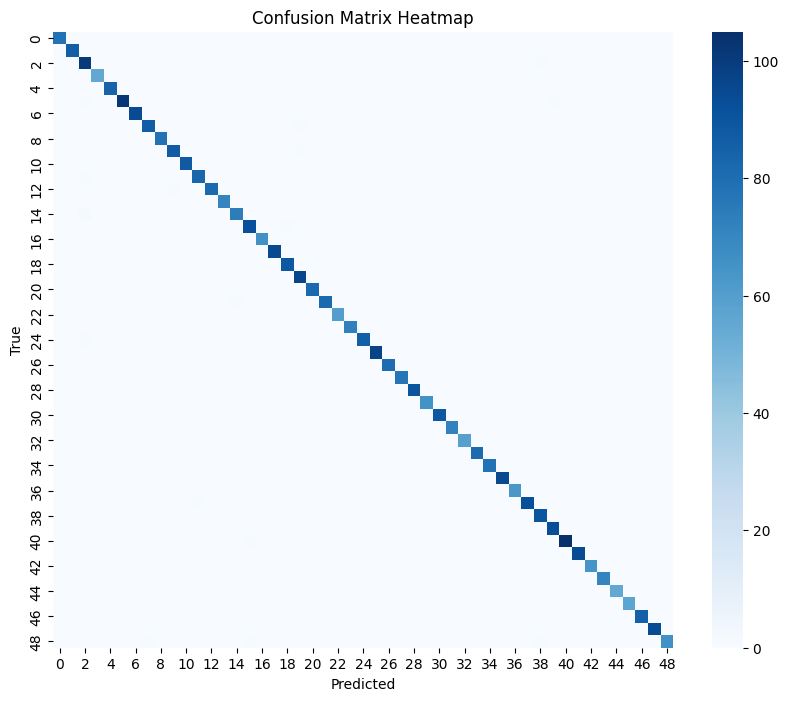


Evaluación en Validation:
Accuracy: 0.6220, Loss: 1.8312


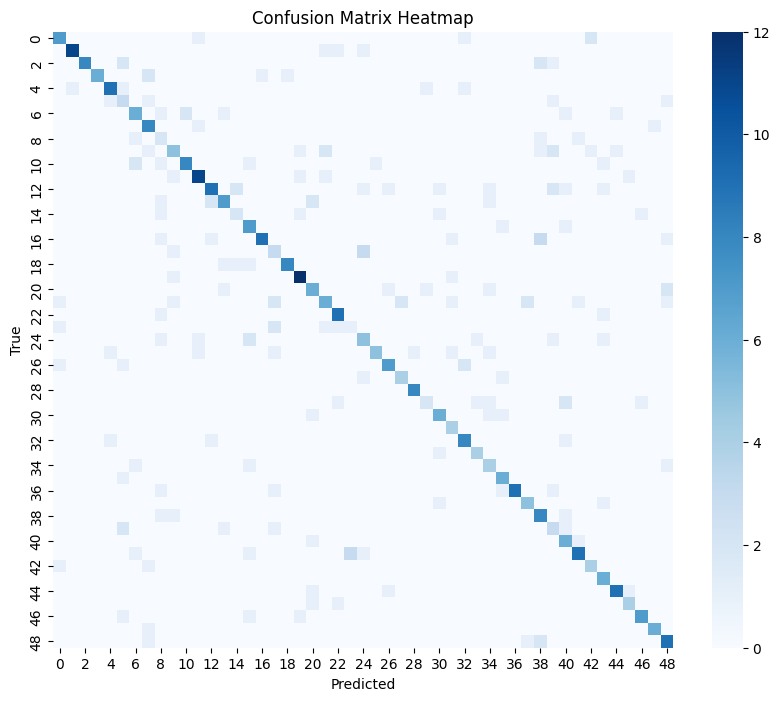

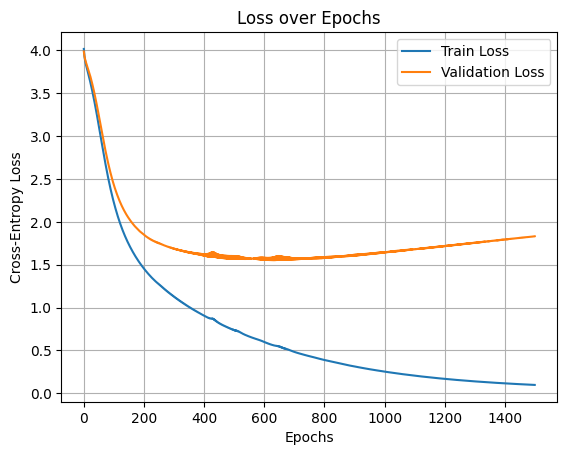

In [5]:
input_size = 784  # Number of features
hidden_layers = [100, 80]  # Two hidden layers
output_size = 49  # 49 classes
learning_rate = 0.01
epochs = 100
num_classes = 49

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)


## Advanced NN

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7922, Val Loss = 3.8286, LR = 0.099333
Epoch 20: Train Loss = 3.6542, Val Loss = 3.7183, LR = 0.098667
Epoch 30: Train Loss = 3.4980, Val Loss = 3.5851, LR = 0.098000
Epoch 40: Train Loss = 3.3228, Val Loss = 3.4280, LR = 0.097333
Epoch 50: Train Loss = 3.1320, Val Loss = 3.2528, LR = 0.096667
Epoch 60: Train Loss = 2.9356, Val Loss = 3.0713, LR = 0.096000
Epoch 70: Train Loss = 2.7437, Val Loss = 2.8932, LR = 0.095333
Epoch 80: Train Loss = 2.5651, Val Loss = 2.7322, LR = 0.094667
Epoch 90: Train Loss = 2.4063, Val Loss = 2.5905, LR = 0.094000
Epoch 100: Train Loss = 2.2669, Val Loss = 2.4673, LR = 0.093333
Epoch 110: Train Loss = 2.1451, Val Loss = 2.3638, LR = 0.092667
Epoch 120: Train Loss = 2.0381, Val Loss = 2.2754, LR = 0.092000
Epoch 130: Train Loss = 1.9441, Val Loss = 2.1996, LR = 0.091333
Epoch 140: Train Loss = 1.8615, Val Loss = 2.1347, LR = 0.090667
Epoch 150: Train Loss = 1.7885, Val 

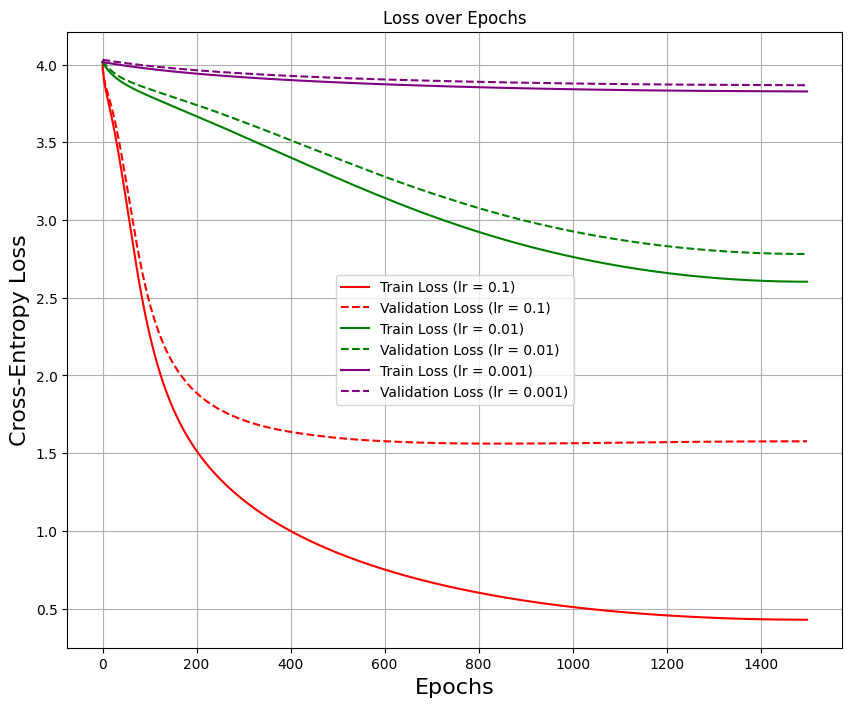

In [6]:
# Rate Scheduling lineal

nn_01 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="linear")
train_losses_01, val_losses_01 = nn_01.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_01, val_accuracy_01, best_epoch_01 = nn_01.get_best_val_stats(X_val, Y_val, val_losses_01)

nn_001 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.01, schedule="linear")
train_losses_001, val_losses_001 = nn_001.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_001, val_accuracy_001, best_epoch_001 = nn_001.get_best_val_stats(X_val, Y_val, val_losses_001)

nn_0001 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, schedule="linear")
train_losses_0001, val_losses_0001 = nn_0001.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_0001, val_accuracy_0001, best_epoch_0001 = nn_0001.get_best_val_stats(X_val, Y_val, val_losses_0001)

# print("Evaluación en Train:")
# acc_train, loss_train, conf_train = nn_01.evaluate(X_train, Y_train)
# print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
# nn_01.plot_confusion_matrix(conf_train)

# print("\nEvaluación en Validation:")
# acc_val, loss_val, conf_val = nn_01.evaluate(X_val, Y_val)
# print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
# nn_01.plot_confusion_matrix(conf_val)

# nn.plot_losses(train_losses_01, val_losses_01)
print("Best results")
print(f"Accuracy: {val_accuracy_01:.4f}, Loss: {best_val_loss_01:.4f}, Epoch: {best_epoch_01}")
print(f"Accuracy: {val_accuracy_001:.4f}, Loss: {best_val_loss_001:.4f}, Epoch: {best_epoch_001}")
print(f"Accuracy: {val_accuracy_0001:.4f}, Loss: {best_val_loss_0001:.4f}, Epoch: {best_epoch_0001}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_01, label='Train Loss (lr = 0.1)', color='red')
plt.plot(val_losses_01, label='Validation Loss (lr = 0.1)', linestyle='--', color='red')
plt.plot(train_losses_001, label='Train Loss (lr = 0.01)', color='green')
plt.plot(val_losses_001, label='Validation Loss (lr = 0.01)', linestyle='--', color='green')
plt.plot(train_losses_0001, label='Train Loss (lr = 0.001)', color='purple')
plt.plot(val_losses_0001, label='Validation Loss (lr = 0.001)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.8426, Val Loss = 3.8748, LR = 0.034868
Epoch 20: Train Loss = 3.8090, Val Loss = 3.8511, LR = 0.012158
Epoch 30: Train Loss = 3.7978, Val Loss = 3.8433, LR = 0.004239
Epoch 40: Train Loss = 3.7940, Val Loss = 3.8406, LR = 0.001478
Epoch 50: Train Loss = 3.7926, Val Loss = 3.8397, LR = 0.000515
Epoch 60: Train Loss = 3.7922, Val Loss = 3.8394, LR = 0.000180
Epoch 70: Train Loss = 3.7920, Val Loss = 3.8392, LR = 0.000063
Epoch 80: Train Loss = 3.7919, Val Loss = 3.8392, LR = 0.000022
Epoch 90: Train Loss = 3.7919, Val Loss = 3.8392, LR = 0.000008
Epoch 100: Train Loss = 3.7919, Val Loss = 3.8392, LR = 0.000003
Epoch 110: Train Loss = 3.7919, Val Loss = 3.8392, LR = 0.000001
Epoch 120: Train Loss = 3.7919, Val Loss = 3.8392, LR = 0.000000
Epoch 130: Train Loss = 3.7919, Val Loss = 3.8392, LR = 0.000000
Epoch 140: Train Loss = 3.7919, Val Loss = 3.8392, LR = 0.000000
Epoch 150: Train Loss = 3.7919, Val 

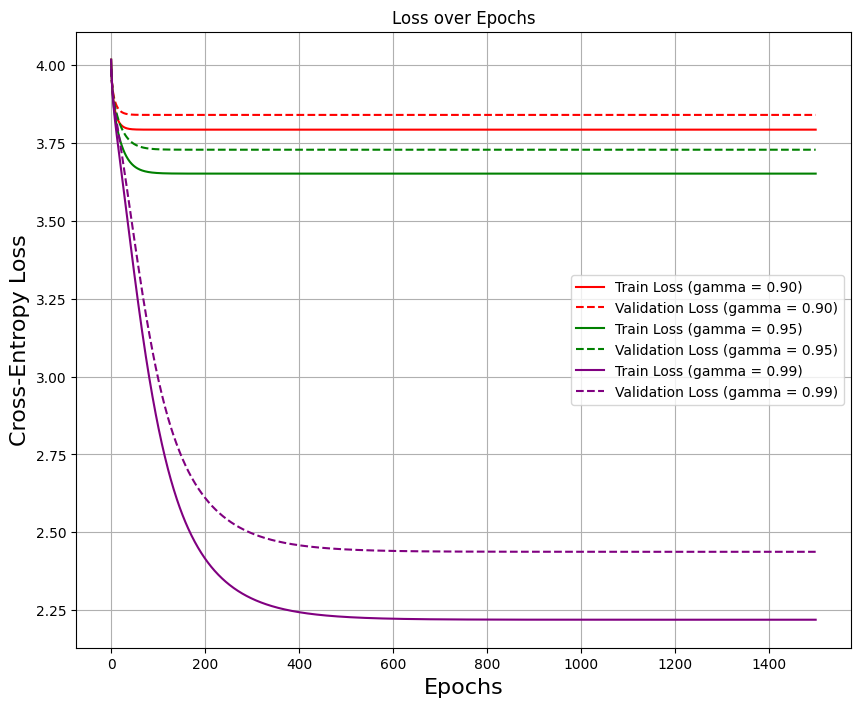

Epoch 0: Train Loss = 4.0162, Val Loss = 4.0312, LR = 0.001000
Epoch 10: Train Loss = 4.0128, Val Loss = 4.0283, LR = 0.000349
Epoch 20: Train Loss = 4.0116, Val Loss = 4.0273, LR = 0.000122
Epoch 30: Train Loss = 4.0112, Val Loss = 4.0270, LR = 0.000042
Epoch 40: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000015
Epoch 50: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000005
Epoch 60: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000002
Epoch 70: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000001
Epoch 80: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000000
Epoch 90: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000000
Epoch 100: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000000
Epoch 110: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000000
Epoch 120: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000000
Epoch 130: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000000
Epoch 140: Train Loss = 4.0110, Val Loss = 4.0268, LR = 0.000000
Epoch 150: Train Loss = 4.0110, Val 

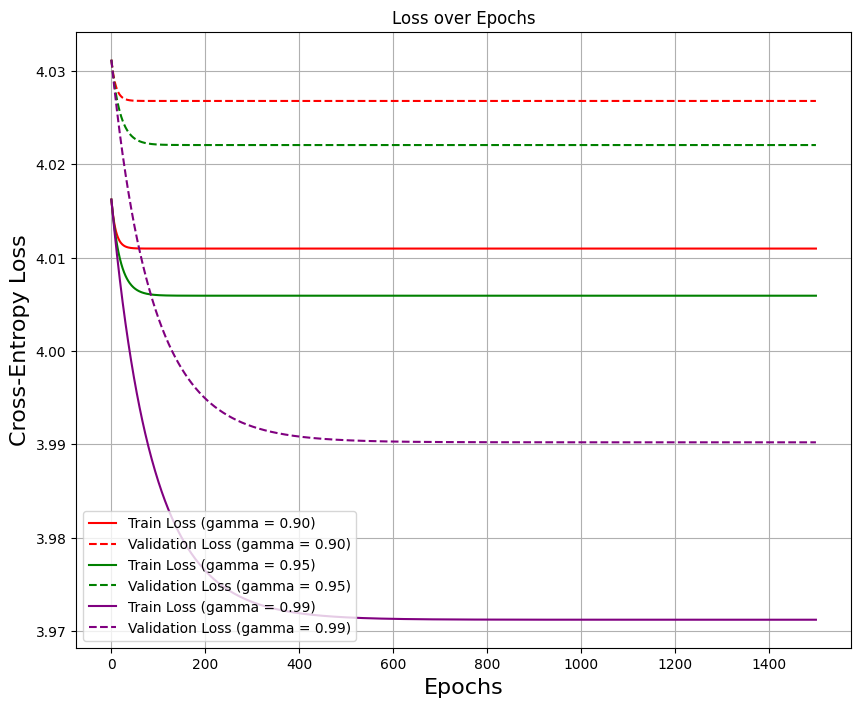

In [7]:
# Rate Scheduling exponential

nn_90 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="exponential", gamma_decay=0.90)
train_losses_90, val_losses_90 = nn_90.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_90, val_accuracy_90, best_epoch_90 = nn_90.get_best_val_stats(X_val, Y_val, val_losses_90)

nn_95 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="exponential", gamma_decay=0.95)
train_losses_95, val_losses_95 = nn_95.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_95, val_accuracy_95, best_epoch_95 = nn_95.get_best_val_stats(X_val, Y_val, val_losses_95)

nn_99 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="exponential", gamma_decay=0.99)
train_losses_99, val_losses_99 = nn_99.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_99, val_accuracy_99, best_epoch_99 = nn_99.get_best_val_stats(X_val, Y_val, val_losses_99)

# print("Evaluación en Train:")
# acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
# print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
# nn.plot_confusion_matrix(conf_train)

# print("\nEvaluación en Validation:")
# acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
# print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
# nn.plot_confusion_matrix(conf_val)

# nn.plot_losses(train_losses, val_losses)

print("Best results")
print(f"Accuracy: {val_accuracy_90:.4f}, Loss: {best_val_loss_90:.4f}, Epoch: {best_epoch_90}")
print(f"Accuracy: {val_accuracy_95:.4f}, Loss: {best_val_loss_95:.4f}, Epoch: {best_epoch_95}")
print(f"Accuracy: {val_accuracy_99:.4f}, Loss: {best_val_loss_99:.4f}, Epoch: {best_epoch_99}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_90, label='Train Loss (gamma = 0.90)', color='red')
plt.plot(val_losses_90, label='Validation Loss (gamma = 0.90)', linestyle='--', color='red')
plt.plot(train_losses_95, label='Train Loss (gamma = 0.95)', color='green')
plt.plot(val_losses_95, label='Validation Loss (gamma = 0.95)', linestyle='--', color='green')
plt.plot(train_losses_99, label='Train Loss (gamma = 0.99)', color='purple')
plt.plot(val_losses_99, label='Validation Loss (gamma = 0.99)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

# Rate Scheduling exponential

nn_90 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, schedule="exponential", gamma_decay=0.90)
train_losses_90, val_losses_90 = nn_90.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_90, val_accuracy_90, best_epoch_90 = nn_90.get_best_val_stats(X_val, Y_val, val_losses_90)

nn_95 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, schedule="exponential", gamma_decay=0.95)
train_losses_95, val_losses_95 = nn_95.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_95, val_accuracy_95, best_epoch_95 = nn_95.get_best_val_stats(X_val, Y_val, val_losses_95)

nn_99 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, schedule="exponential", gamma_decay=0.99)
train_losses_99, val_losses_99 = nn_99.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_99, val_accuracy_99, best_epoch_99 = nn_99.get_best_val_stats(X_val, Y_val, val_losses_99)

print("Best results")
print(f"Accuracy: {val_accuracy_90:.4f}, Loss: {best_val_loss_90:.4f}, Epoch: {best_epoch_90}")
print(f"Accuracy: {val_accuracy_95:.4f}, Loss: {best_val_loss_95:.4f}, Epoch: {best_epoch_95}")
print(f"Accuracy: {val_accuracy_99:.4f}, Loss: {best_val_loss_99:.4f}, Epoch: {best_epoch_99}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_90, label='Train Loss (gamma = 0.90)', color='red')
plt.plot(val_losses_90, label='Validation Loss (gamma = 0.90)', linestyle='--', color='red')
plt.plot(train_losses_95, label='Train Loss (gamma = 0.95)', color='green')
plt.plot(val_losses_95, label='Validation Loss (gamma = 0.95)', linestyle='--', color='green')
plt.plot(train_losses_99, label='Train Loss (gamma = 0.99)', color='purple')
plt.plot(val_losses_99, label='Validation Loss (gamma = 0.99)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

## Mini Batch SGD

Epoch 0: Train Loss = 2.3689, Val Loss = 2.5186, LR = 0.100000
Epoch 10: Train Loss = 0.2415, Val Loss = 1.5768, LR = 0.100000

Tiempo total de entrenamiento: 2.39 segundos
Epoch 0: Train Loss = 3.0388, Val Loss = 3.1724, LR = 0.100000
Epoch 10: Train Loss = 0.6632, Val Loss = 1.5940, LR = 0.100000

Tiempo total de entrenamiento: 1.90 segundos
Epoch 0: Train Loss = 3.3350, Val Loss = 3.4504, LR = 0.100000
Epoch 10: Train Loss = 0.9299, Val Loss = 1.6393, LR = 0.100000

Tiempo total de entrenamiento: 1.74 segundos
Best results
Accuracy: 0.6340, Loss: 1.5131, Epoch: 9
Accuracy: 0.6040, Loss: 1.5940, Epoch: 10
Accuracy: 0.6140, Loss: 1.5679, Epoch: 12


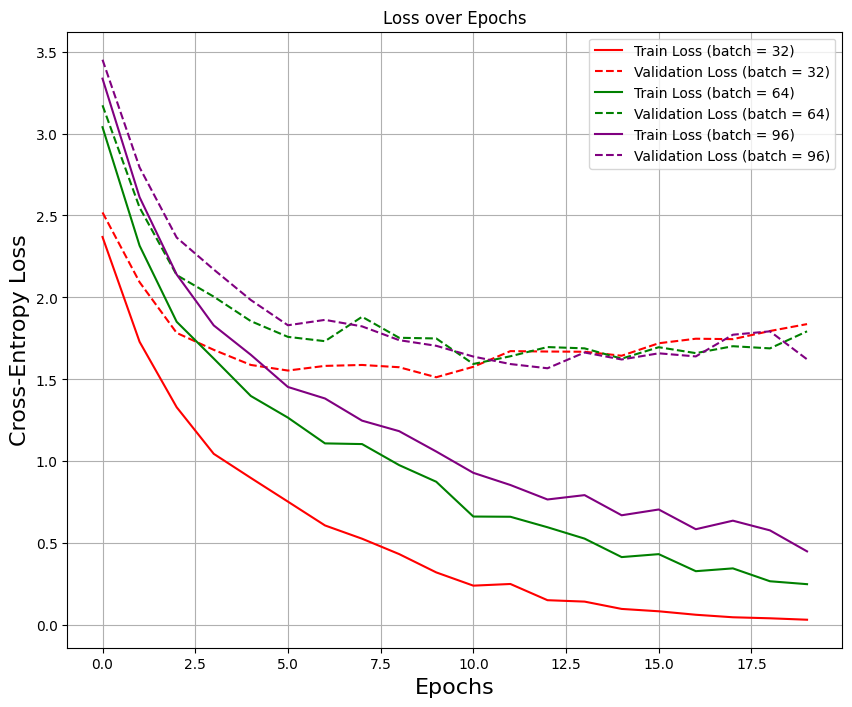

Epoch 0: Train Loss = 3.9619, Val Loss = 3.9819, LR = 0.001000
Epoch 10: Train Loss = 3.7392, Val Loss = 3.7977, LR = 0.001000

Tiempo total de entrenamiento: 2.37 segundos
Epoch 0: Train Loss = 3.9862, Val Loss = 4.0039, LR = 0.001000
Epoch 10: Train Loss = 3.8372, Val Loss = 3.8750, LR = 0.001000

Tiempo total de entrenamiento: 2.00 segundos
Epoch 0: Train Loss = 3.9955, Val Loss = 4.0124, LR = 0.001000
Epoch 10: Train Loss = 3.8765, Val Loss = 3.9071, LR = 0.001000

Tiempo total de entrenamiento: 1.69 segundos
Best results
Accuracy: 0.0780, Loss: 3.6598, Epoch: 19
Accuracy: 0.0320, Loss: 3.8107, Epoch: 19
Accuracy: 0.0260, Loss: 3.8575, Epoch: 19


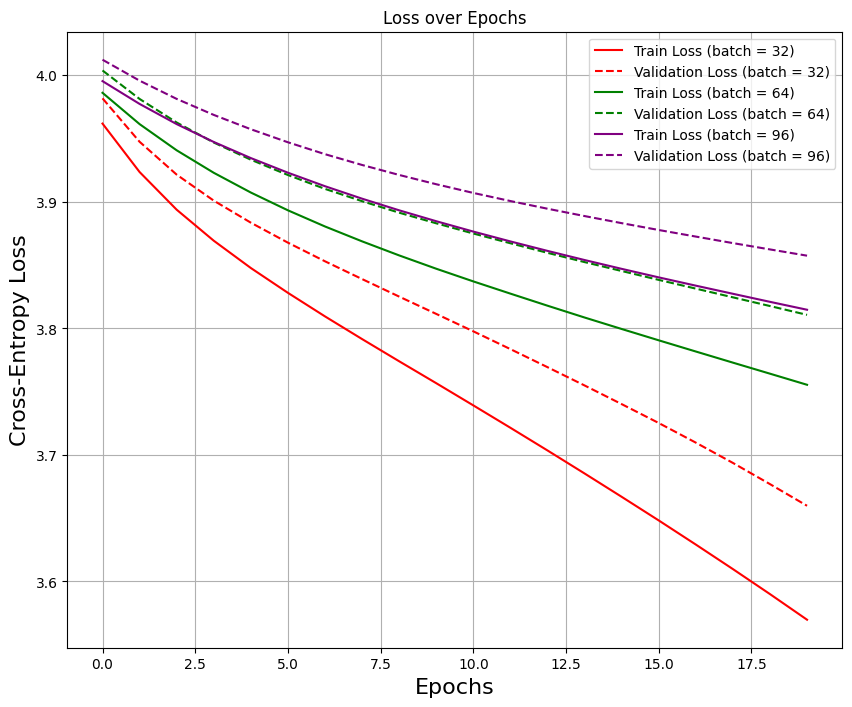

In [8]:
nn_32 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, use_mini_batch=True, batch_size=32)
train_losses_32, val_losses_32 = nn_32.train(X_train, Y_train, X_val, Y_val, epochs=20)
best_val_loss_32, val_accuracy_32, best_epoch_32 = nn_32.get_best_val_stats(X_val, Y_val, val_losses_32)

nn_64 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, use_mini_batch=True, batch_size=64)
train_losses_64, val_losses_64 = nn_64.train(X_train, Y_train, X_val, Y_val, epochs=20)
best_val_loss_64, val_accuracy_64, best_epoch_64 = nn_64.get_best_val_stats(X_val, Y_val, val_losses_64)

nn_96 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, use_mini_batch=True, batch_size=96)
train_losses_96, val_losses_96 = nn_96.train(X_train, Y_train, X_val, Y_val, epochs=20)
best_val_loss_96, val_accuracy_96, best_epoch_96 = nn_96.get_best_val_stats(X_val, Y_val, val_losses_96)

# print("Evaluación en Train:")
# acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
# print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
# nn.plot_confusion_matrix(conf_train)

# print("\nEvaluación en Validation:")
# acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
# print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
# nn.plot_confusion_matrix(conf_val)

# nn.plot_losses(train_losses, val_losses)

print("Best results")
print(f"Accuracy: {val_accuracy_32:.4f}, Loss: {best_val_loss_32:.4f}, Epoch: {best_epoch_32}")
print(f"Accuracy: {val_accuracy_64:.4f}, Loss: {best_val_loss_64:.4f}, Epoch: {best_epoch_64}")
print(f"Accuracy: {val_accuracy_96:.4f}, Loss: {best_val_loss_96:.4f}, Epoch: {best_epoch_96}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_32, label='Train Loss (batch = 32)', color='red')
plt.plot(val_losses_32, label='Validation Loss (batch = 32)', linestyle='--', color='red')
plt.plot(train_losses_64, label='Train Loss (batch = 64)', color='green')
plt.plot(val_losses_64, label='Validation Loss (batch = 64)', linestyle='--', color='green')
plt.plot(train_losses_96, label='Train Loss (batch = 96)', color='purple')
plt.plot(val_losses_96, label='Validation Loss (batch = 96)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

# Con lr = 0.001

nn_32 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, use_mini_batch=True, batch_size=32)
train_losses_32, val_losses_32 = nn_32.train(X_train, Y_train, X_val, Y_val, epochs=20)
best_val_loss_32, val_accuracy_32, best_epoch_32 = nn_32.get_best_val_stats(X_val, Y_val, val_losses_32)

nn_64 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, use_mini_batch=True, batch_size=64)
train_losses_64, val_losses_64 = nn_64.train(X_train, Y_train, X_val, Y_val, epochs=20)
best_val_loss_64, val_accuracy_64, best_epoch_64 = nn_64.get_best_val_stats(X_val, Y_val, val_losses_64)

nn_96 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, use_mini_batch=True, batch_size=96)
train_losses_96, val_losses_96 = nn_96.train(X_train, Y_train, X_val, Y_val, epochs=20)
best_val_loss_96, val_accuracy_96, best_epoch_96 = nn_96.get_best_val_stats(X_val, Y_val, val_losses_96)



print("Best results")
print(f"Accuracy: {val_accuracy_32:.4f}, Loss: {best_val_loss_32:.4f}, Epoch: {best_epoch_32}")
print(f"Accuracy: {val_accuracy_64:.4f}, Loss: {best_val_loss_64:.4f}, Epoch: {best_epoch_64}")
print(f"Accuracy: {val_accuracy_96:.4f}, Loss: {best_val_loss_96:.4f}, Epoch: {best_epoch_96}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_32, label='Train Loss (batch = 32)', color='red')
plt.plot(val_losses_32, label='Validation Loss (batch = 32)', linestyle='--', color='red')
plt.plot(train_losses_64, label='Train Loss (batch = 64)', color='green')
plt.plot(val_losses_64, label='Validation Loss (batch = 64)', linestyle='--', color='green')
plt.plot(train_losses_96, label='Train Loss (batch = 96)', color='purple')
plt.plot(val_losses_96, label='Validation Loss (batch = 96)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

## ADAM optimizator

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9296, LR = 0.001000
Epoch 10: Train Loss = 3.3877, Val Loss = 3.4467, LR = 0.001000
Epoch 20: Train Loss = 2.7020, Val Loss = 2.8439, LR = 0.001000
Epoch 30: Train Loss = 2.0827, Val Loss = 2.3061, LR = 0.001000
Epoch 40: Train Loss = 1.6423, Val Loss = 2.0084, LR = 0.001000
Epoch 50: Train Loss = 1.3282, Val Loss = 1.8208, LR = 0.001000
Epoch 60: Train Loss = 1.0919, Val Loss = 1.7142, LR = 0.001000
Epoch 70: Train Loss = 0.9047, Val Loss = 1.6497, LR = 0.001000
Epoch 80: Train Loss = 0.7503, Val Loss = 1.6130, LR = 0.001000
Epoch 90: Train Loss = 0.6210, Val Loss = 1.5985, LR = 0.001000
Epoch 100: Train Loss = 0.5127, Val Loss = 1.5983, LR = 0.001000
Epoch 110: Train Loss = 0.4220, Val Loss = 1.6108, LR = 0.001000
Epoch 120: Train Loss = 0.3461, Val Loss = 1.6290, LR = 0.001000
Epoch 130: Train Loss = 0.2824, Val Loss = 1.6526, LR = 0.001000
Epoch 140: Train Loss = 0.2298, Val Loss = 1.6797, LR = 0.001000
Epoch 150: Train Loss = 0.1870, Val 

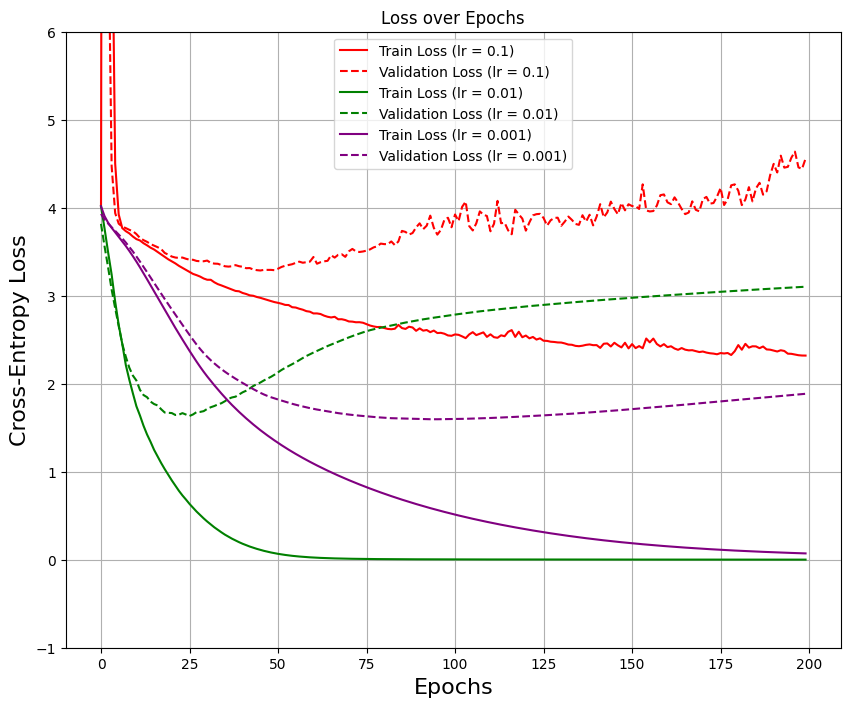

In [81]:
nn_0001 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, optimizer='adam')
train_losses_0001, val_losses_0001 = nn_0001.train(X_train, Y_train, X_val, Y_val, epochs=200)
best_val_loss_0001, val_accuracy_0001, best_epoch_0001 = nn_0001.get_best_val_stats(X_val, Y_val, val_losses_0001)

nn_001 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.01, optimizer='adam')
train_losses_001, val_losses_001 = nn_001.train(X_train, Y_train, X_val, Y_val, epochs=200)
best_val_loss_001, val_accuracy_001, best_epoch_001 = nn_001.get_best_val_stats(X_val, Y_val, val_losses_001)

nn_01 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, optimizer='adam')
train_losses_01, val_losses_01 = nn_01.train(X_train, Y_train, X_val, Y_val, epochs=200)
best_val_loss_01, val_accuracy_01, best_epoch_01 = nn_01.get_best_val_stats(X_val, Y_val, val_losses_01)

# print("Evaluación en Train:")
# acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
# print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
# nn.plot_confusion_matrix(conf_train)

# print("\nEvaluación en Validation:")
# acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
# print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
# nn.plot_confusion_matrix(conf_val)

# nn.plot_losses(train_losses, val_losses)

print("Best results")
print(f"Accuracy: {val_accuracy_01:.4f}, Loss: {best_val_loss_01:.4f}, Epoch: {best_epoch_01}")
print(f"Accuracy: {val_accuracy_001:.4f}, Loss: {best_val_loss_001:.4f}, Epoch: {best_epoch_001}")
print(f"Accuracy: {val_accuracy_0001:.4f}, Loss: {best_val_loss_0001:.4f}, Epoch: {best_epoch_0001}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_01, label='Train Loss (lr = 0.1)', color='red')
plt.plot(val_losses_01, label='Validation Loss (lr = 0.1)', linestyle='--', color='red')
plt.plot(train_losses_001, label='Train Loss (lr = 0.01)', color='green')
plt.plot(val_losses_001, label='Validation Loss (lr = 0.01)', linestyle='--', color='green')
plt.plot(train_losses_0001, label='Train Loss (lr = 0.001)', color='purple')
plt.plot(val_losses_0001, label='Validation Loss (lr = 0.001)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.ylim(-1,6)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

## Regularizacion L2

Epoch 0: Train Loss = 4.0732, Val Loss = 4.4428, LR = 0.100000
Epoch 10: Train Loss = 3.8488, Val Loss = 4.2838, LR = 0.100000
Epoch 20: Train Loss = 3.7095, Val Loss = 4.1726, LR = 0.100000
Epoch 30: Train Loss = 3.5508, Val Loss = 4.0378, LR = 0.100000
Epoch 40: Train Loss = 3.3713, Val Loss = 3.8778, LR = 0.100000
Epoch 50: Train Loss = 3.1746, Val Loss = 3.6990, LR = 0.100000
Epoch 60: Train Loss = 2.9719, Val Loss = 3.5133, LR = 0.100000
Epoch 70: Train Loss = 2.7735, Val Loss = 3.3329, LR = 0.100000
Epoch 80: Train Loss = 2.5900, Val Loss = 3.1707, LR = 0.100000
Epoch 90: Train Loss = 2.4275, Val Loss = 3.0293, LR = 0.100000
Epoch 100: Train Loss = 2.2853, Val Loss = 2.9079, LR = 0.100000
Epoch 110: Train Loss = 2.1610, Val Loss = 2.8069, LR = 0.100000
Epoch 120: Train Loss = 2.0524, Val Loss = 2.7208, LR = 0.100000
Epoch 130: Train Loss = 1.9573, Val Loss = 2.6482, LR = 0.100000
Epoch 140: Train Loss = 1.8739, Val Loss = 2.5863, LR = 0.100000
Epoch 150: Train Loss = 1.7998, Val 

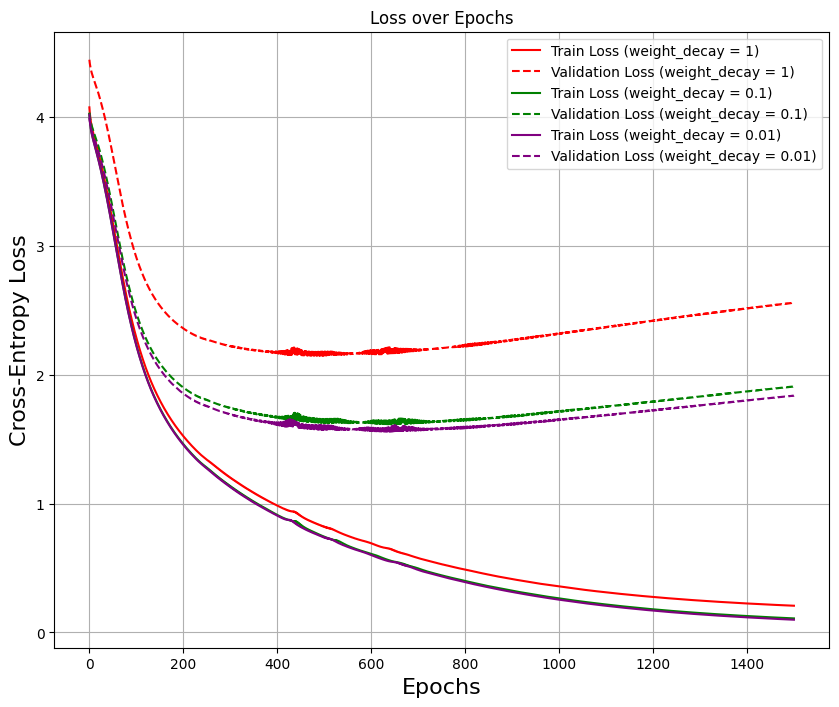

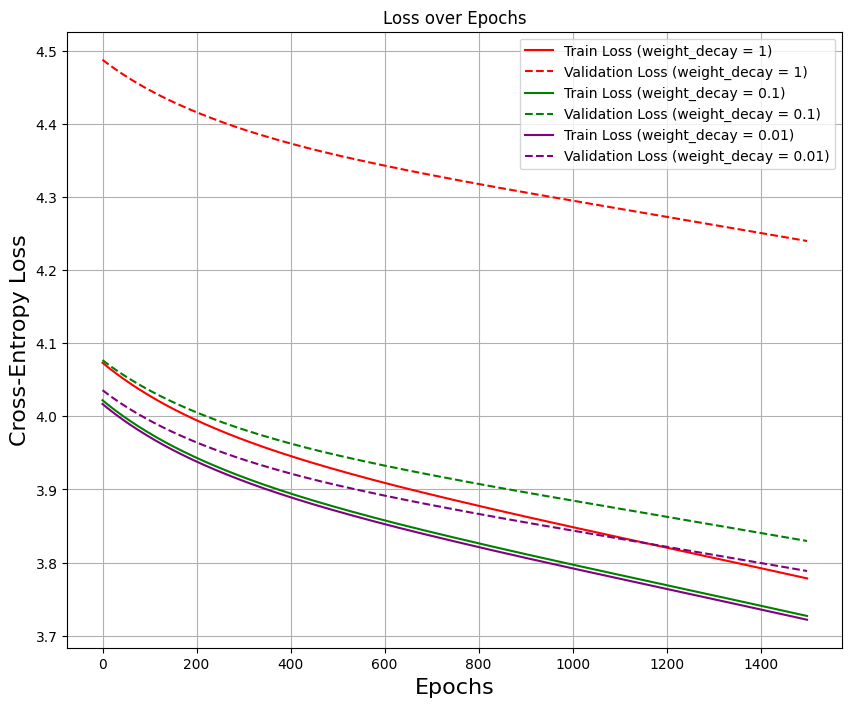

In [10]:
nn_1 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, l2_lambda=1)
train_losses_1, val_losses_1 = nn_1.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_1, val_accuracy_1, best_epoch_1 = nn_1.get_best_val_stats(X_val, Y_val, val_losses_1)

nn_01 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, l2_lambda=0.1)
train_losses_01, val_losses_01 = nn_01.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_01, val_accuracy_01, best_epoch_01 = nn_01.get_best_val_stats(X_val, Y_val, val_losses_01)

nn_001 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, l2_lambda=0.01)
train_losses_001, val_losses_001 = nn_001.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_001, val_accuracy_001, best_epoch_001 = nn_001.get_best_val_stats(X_val, Y_val, val_losses_001)

# print("Evaluación en Train:")
# acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
# print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
# nn.plot_confusion_matrix(conf_train)

# print("\nEvaluación en Validation:")
# acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
# print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
# nn.plot_confusion_matrix(conf_val)

# nn.plot_losses(train_losses, val_losses)

print("Best results")
print(f"Accuracy: {val_accuracy_1:.4f}, Loss: {best_val_loss_1:.4f}, Epoch: {best_epoch_1}")
print(f"Accuracy: {val_accuracy_01:.4f}, Loss: {best_val_loss_01:.4f}, Epoch: {best_epoch_01}")
print(f"Accuracy: {val_accuracy_001:.4f}, Loss: {best_val_loss_001:.4f}, Epoch: {best_epoch_001}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_1, label='Train Loss (weight_decay = 1)', color='red')
plt.plot(val_losses_1, label='Validation Loss (weight_decay = 1)', linestyle='--', color='red')
plt.plot(train_losses_01, label='Train Loss (weight_decay = 0.1)', color='green')
plt.plot(val_losses_01, label='Validation Loss (weight_decay = 0.1)', linestyle='--', color='green')
plt.plot(train_losses_001, label='Train Loss (weight_decay = 0.01)', color='purple')
plt.plot(val_losses_001, label='Validation Loss (weight_decay = 0.01)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)

# Con lr = 0.001

nn_1 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, l2_lambda=1)
train_losses_1, val_losses_1 = nn_1.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_1, val_accuracy_1, best_epoch_1 = nn_1.get_best_val_stats(X_val, Y_val, val_losses_1)

nn_01 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, l2_lambda=0.1)
train_losses_01, val_losses_01 = nn_01.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_01, val_accuracy_01, best_epoch_01 = nn_01.get_best_val_stats(X_val, Y_val, val_losses_01)

nn_001 = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, l2_lambda=0.01)
train_losses_001, val_losses_001 = nn_001.train(X_train, Y_train, X_val, Y_val, epochs=1500)
best_val_loss_001, val_accuracy_001, best_epoch_001 = nn_001.get_best_val_stats(X_val, Y_val, val_losses_001)

print("Best results")
print(f"Accuracy: {val_accuracy_1:.4f}, Loss: {best_val_loss_1:.4f}, Epoch: {best_epoch_1}")
print(f"Accuracy: {val_accuracy_01:.4f}, Loss: {best_val_loss_01:.4f}, Epoch: {best_epoch_01}")
print(f"Accuracy: {val_accuracy_001:.4f}, Loss: {best_val_loss_001:.4f}, Epoch: {best_epoch_001}")

plt.figure(figsize=(10,8))
plt.plot(train_losses_1, label='Train Loss (weight_decay = 1)', color='red')
plt.plot(val_losses_1, label='Validation Loss (weight_decay = 1)', linestyle='--', color='red')
plt.plot(train_losses_01, label='Train Loss (weight_decay = 0.1)', color='green')
plt.plot(val_losses_01, label='Validation Loss (weight_decay = 0.1)', linestyle='--', color='green')
plt.plot(train_losses_001, label='Train Loss (weight_decay = 0.01)', color='purple')
plt.plot(val_losses_001, label='Validation Loss (weight_decay = 0.01)', linestyle='--', color='purple')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-Entropy Loss', fontsize=16)
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)


## Early Stopping

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7918, Val Loss = 3.8282, LR = 0.100000
Epoch 20: Train Loss = 3.6523, Val Loss = 3.7165, LR = 0.100000
Epoch 30: Train Loss = 3.4931, Val Loss = 3.5805, LR = 0.100000
Epoch 40: Train Loss = 3.3129, Val Loss = 3.4185, LR = 0.100000
Epoch 50: Train Loss = 3.1155, Val Loss = 3.2369, LR = 0.100000
Epoch 60: Train Loss = 2.9118, Val Loss = 3.0480, LR = 0.100000
Epoch 70: Train Loss = 2.7126, Val Loss = 2.8639, LR = 0.100000
Epoch 80: Train Loss = 2.5283, Val Loss = 2.6981, LR = 0.100000
Epoch 90: Train Loss = 2.3651, Val Loss = 2.5529, LR = 0.100000
Epoch 100: Train Loss = 2.2222, Val Loss = 2.4280, LR = 0.100000
Epoch 110: Train Loss = 2.0973, Val Loss = 2.3235, LR = 0.100000
Epoch 120: Train Loss = 1.9882, Val Loss = 2.2340, LR = 0.100000
Epoch 130: Train Loss = 1.8924, Val Loss = 2.1583, LR = 0.100000
Epoch 140: Train Loss = 1.8085, Val Loss = 2.0933, LR = 0.100000
Epoch 150: Train Loss = 1.7340, Val 

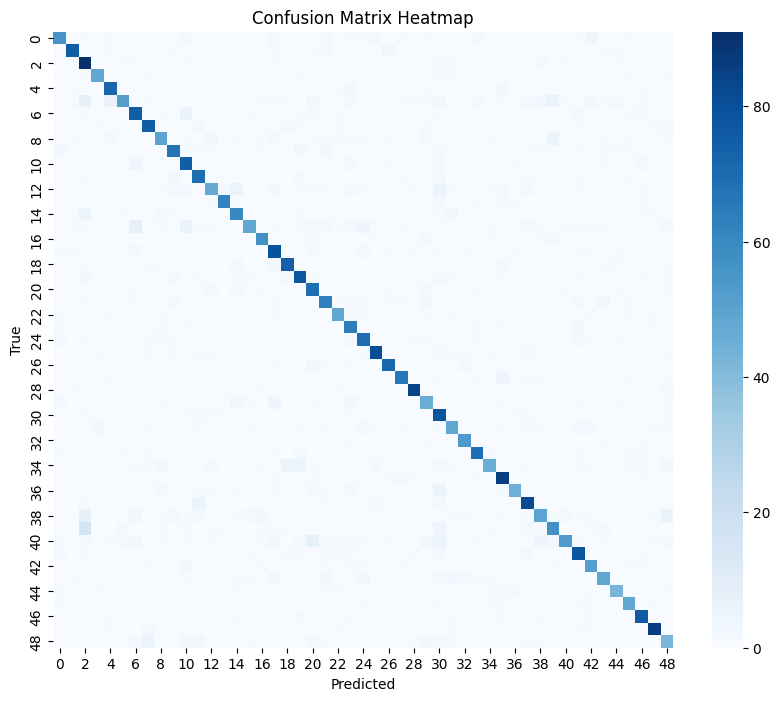


Evaluación en Validation:
Accuracy: 0.5980, Loss: 1.5952


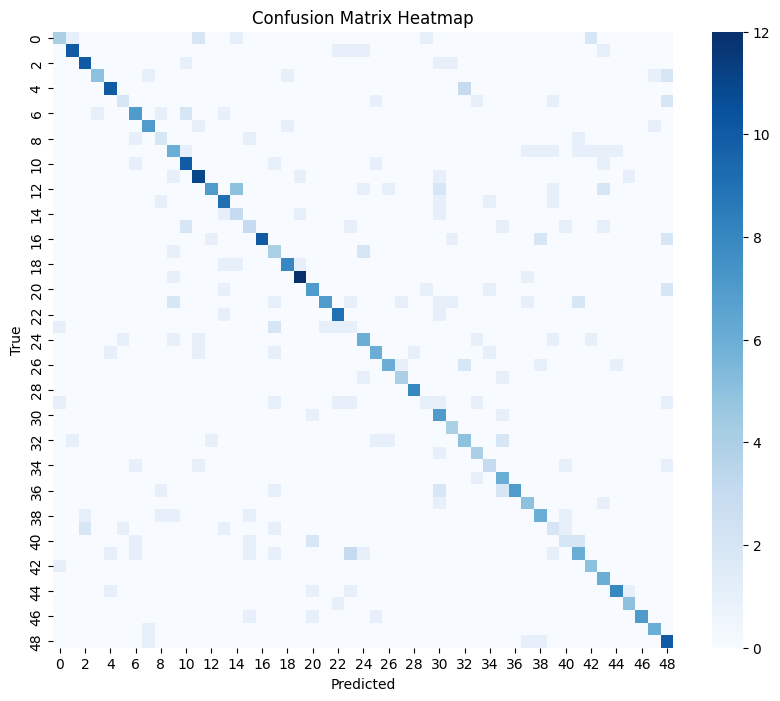

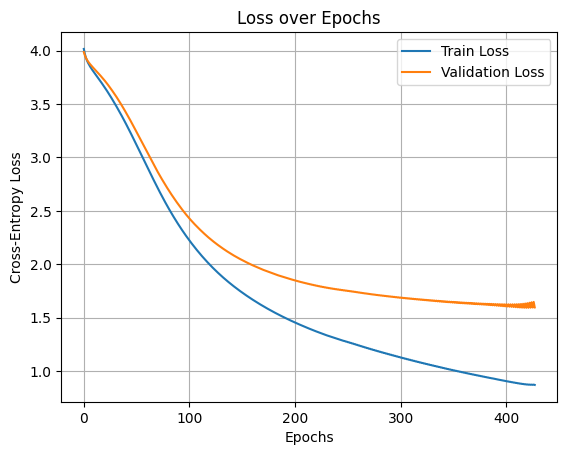

In [11]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500,early_stopping=True, min_delta=1e-3)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## M1

Epoch 0: Train Loss = 2.1198, Val Loss = 2.3450, LR = 0.001000
Epoch 10: Train Loss = 0.0625, Val Loss = 1.5690, LR = 0.000817

Early stopping at epoch 16 (no improvement in 10 epochs).

Tiempo total de entrenamiento: 16.05 segundos
Evaluación en Train:
Accuracy: 0.9998, Loss: 0.0190


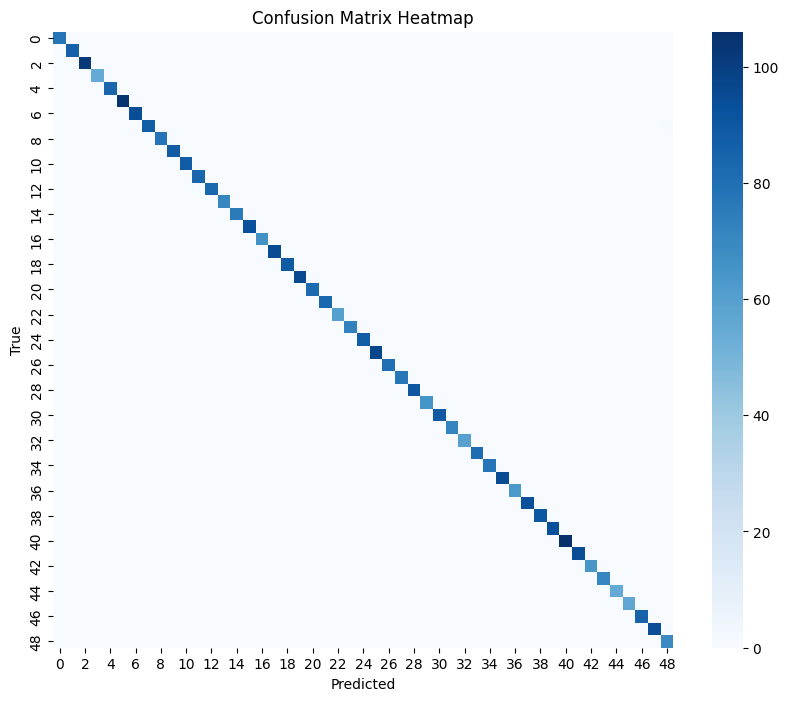


Evaluación en Validation:
Accuracy: 0.6640, Loss: 1.6690


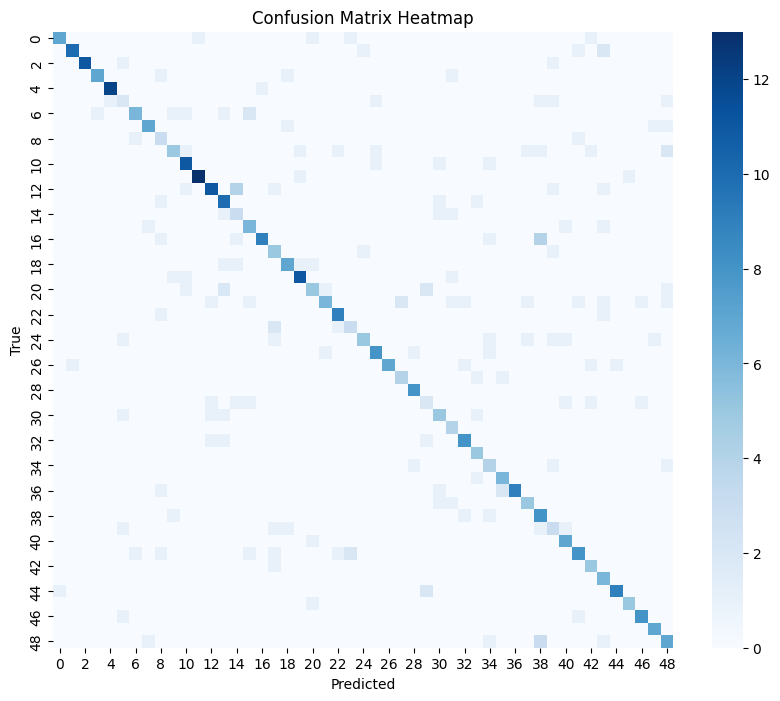

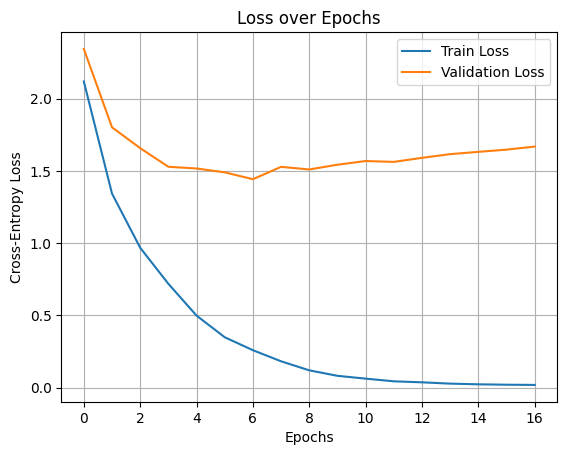

In [ ]:
nn = NeuralNetwork(layer_dims=[784, 400, 100, 80, 49], learning_rate=0.001,schedule='exponential',gamma_decay=0.98, optimizer='adam',use_mini_batch=True,l2_lambda=0.01,batch_size=64)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=300, early_stopping=True, patience=10, min_delta=1e-3)
# usar 32 o 64 no presenta mejoras notorias, para el overleaf esto.
print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)
# Accuracy: 0.6840, Loss: 1.6010 64
# Accuracy: 0.6780, Loss: 1.5891 32

## 4


## M2

Epoch 1: Train Loss=3.6542, Acc=0.0655 | Val Loss=3.3782, Acc=0.1160 | LR=0.000980
Epoch 2: Train Loss=3.0637, Acc=0.1910 | Val Loss=2.7088, Acc=0.2740 | LR=0.000960
Epoch 3: Train Loss=2.5651, Acc=0.3242 | Val Loss=2.3645, Acc=0.3740 | LR=0.000941
Epoch 4: Train Loss=2.3168, Acc=0.3860 | Val Loss=2.3180, Acc=0.3820 | LR=0.000922
Epoch 5: Train Loss=2.1684, Acc=0.4193 | Val Loss=2.1787, Acc=0.4040 | LR=0.000904
Epoch 6: Train Loss=2.0638, Acc=0.4485 | Val Loss=2.1329, Acc=0.4360 | LR=0.000886
Epoch 7: Train Loss=1.9681, Acc=0.4713 | Val Loss=2.1446, Acc=0.4240 | LR=0.000868
Epoch 8: Train Loss=1.8972, Acc=0.4915 | Val Loss=2.0657, Acc=0.4380 | LR=0.000851
Epoch 9: Train Loss=1.8387, Acc=0.5028 | Val Loss=2.0662, Acc=0.4340 | LR=0.000834
Epoch 10: Train Loss=1.7836, Acc=0.5200 | Val Loss=2.0403, Acc=0.4680 | LR=0.000817
Epoch 11: Train Loss=1.7118, Acc=0.5353 | Val Loss=1.9925, Acc=0.4760 | LR=0.000801
Epoch 12: Train Loss=1.6602, Acc=0.5545 | Val Loss=1.9076, Acc=0.4960 | LR=0.000785
E

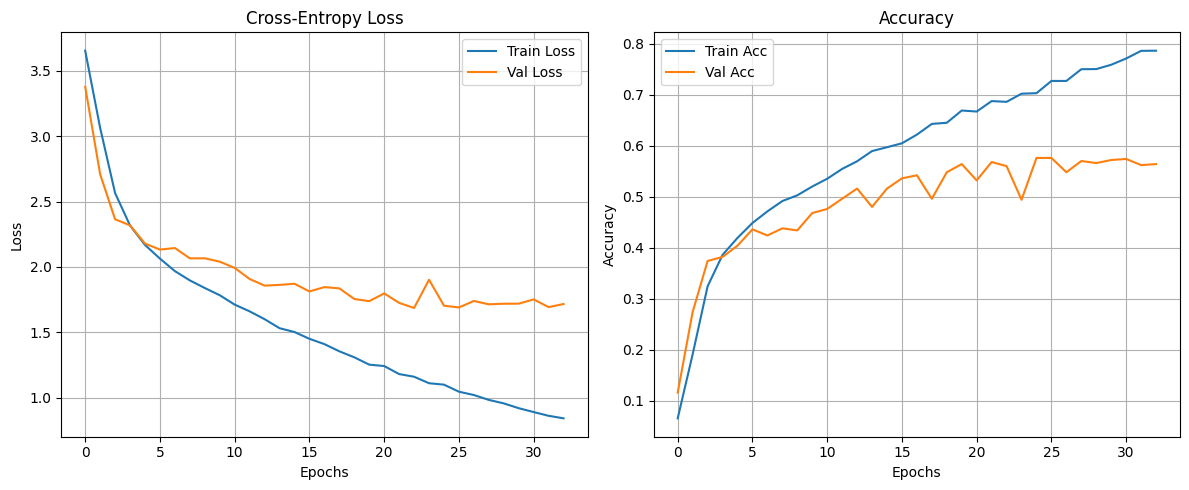

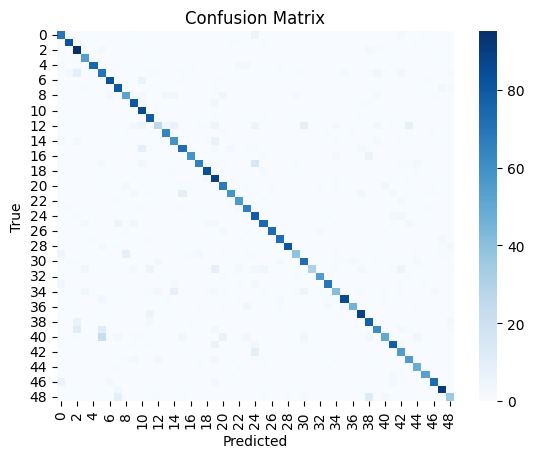

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

input_dim = 784
hidden_dims = [400, 100, 80]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    outputs = model(X_train_tensor)
    preds = torch.argmax(outputs, dim=1).numpy()
    y_true = Y_train_tensor.numpy()
    cm = confusion_matrix(y_true, preds)

    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Val Loss=1.7394, Acc=0.5480

## M3

Epoch 1: Train Loss=2.9504, Acc=0.2675 | Val Loss=2.1692, Acc=0.4640 | LR=0.000980
Epoch 2: Train Loss=2.0672, Acc=0.4617 | Val Loss=1.9102, Acc=0.5300 | LR=0.000960
Epoch 3: Train Loss=1.8271, Acc=0.5298 | Val Loss=1.8417, Acc=0.5200 | LR=0.000941
Epoch 4: Train Loss=1.6641, Acc=0.5670 | Val Loss=1.7905, Acc=0.5220 | LR=0.000922
Epoch 5: Train Loss=1.5809, Acc=0.5803 | Val Loss=1.7279, Acc=0.5640 | LR=0.000904
Epoch 6: Train Loss=1.5079, Acc=0.6138 | Val Loss=1.6605, Acc=0.5700 | LR=0.000886
Epoch 7: Train Loss=1.4398, Acc=0.6198 | Val Loss=1.7027, Acc=0.5720 | LR=0.000868
Epoch 8: Train Loss=1.3731, Acc=0.6472 | Val Loss=1.5755, Acc=0.5980 | LR=0.000851
Epoch 9: Train Loss=1.3407, Acc=0.6485 | Val Loss=1.5471, Acc=0.6200 | LR=0.000834
Epoch 10: Train Loss=1.2934, Acc=0.6625 | Val Loss=1.5677, Acc=0.6080 | LR=0.000817
Epoch 11: Train Loss=1.2423, Acc=0.6790 | Val Loss=1.5527, Acc=0.6060 | LR=0.000801
Epoch 12: Train Loss=1.2263, Acc=0.6783 | Val Loss=1.5049, Acc=0.6300 | LR=0.000785
E

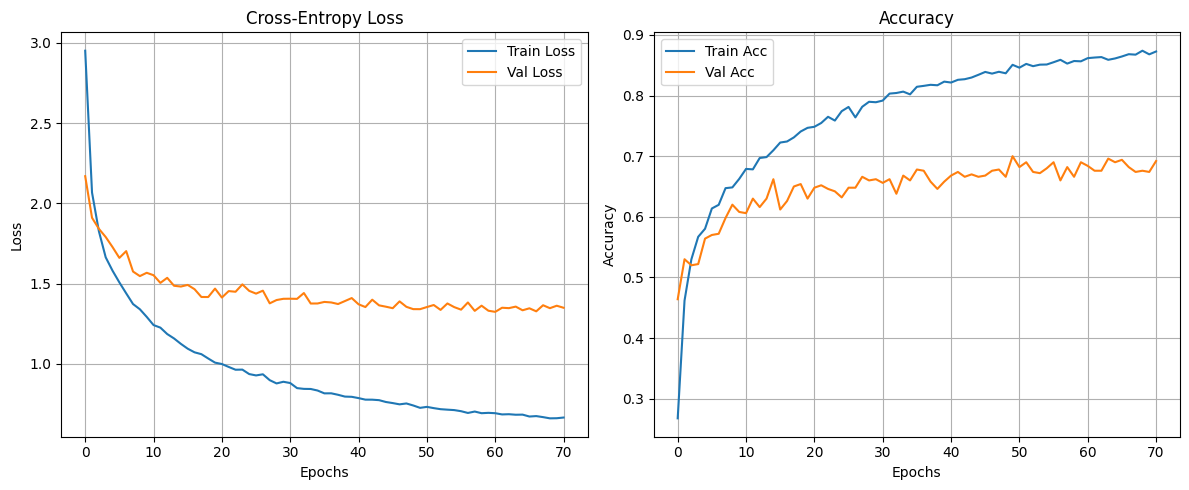

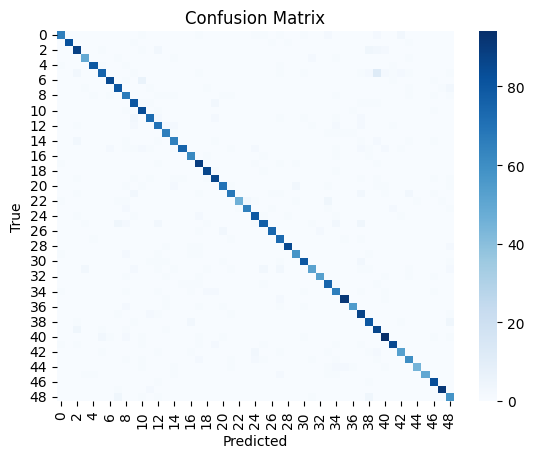

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Prepare your data (assumes X_train, Y_train, X_val, Y_val are numpy arrays)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, Y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, Y_val_tensor), batch_size=64)

# Mejor {400,200,80}
# Aun mejor {200, 80}
#Mas mejor {200,100}
# Mas mas mejor {400}
#menos capas es mejor
# {1000}
# mas nodos es mejor tambien
#{2000}
#{2000,1000}

input_dim = 784
hidden_dims = [2000, 1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    outputs = model(X_train_tensor)
    preds = torch.argmax(outputs, dim=1).numpy()
    y_true = Y_train_tensor.numpy()
    cm = confusion_matrix(y_true, preds)

    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

## M4

Epoch 1: Train Loss=3.6144, Acc=0.0645 | Val Loss=3.3099, Acc=0.1100 | LR=0.000980
Epoch 2: Train Loss=3.0740, Acc=0.1480 | Val Loss=2.8805, Acc=0.1760 | LR=0.000960
Epoch 3: Train Loss=2.7414, Acc=0.2285 | Val Loss=2.6982, Acc=0.2740 | LR=0.000941
Epoch 4: Train Loss=2.5217, Acc=0.2797 | Val Loss=2.6216, Acc=0.2600 | LR=0.000922
Epoch 5: Train Loss=2.3446, Acc=0.3397 | Val Loss=2.4739, Acc=0.3560 | LR=0.000904
Epoch 6: Train Loss=2.1646, Acc=0.4007 | Val Loss=2.4274, Acc=0.3320 | LR=0.000886
Epoch 7: Train Loss=2.0485, Acc=0.4283 | Val Loss=2.1554, Acc=0.4120 | LR=0.000868
Epoch 8: Train Loss=1.9175, Acc=0.4575 | Val Loss=2.1726, Acc=0.4000 | LR=0.000851
Epoch 9: Train Loss=1.8077, Acc=0.4995 | Val Loss=2.0410, Acc=0.4500 | LR=0.000834
Epoch 10: Train Loss=1.7017, Acc=0.5288 | Val Loss=2.0148, Acc=0.4440 | LR=0.000817
Epoch 11: Train Loss=1.6244, Acc=0.5455 | Val Loss=1.9964, Acc=0.4640 | LR=0.000801
Epoch 12: Train Loss=1.5330, Acc=0.5737 | Val Loss=1.8756, Acc=0.5140 | LR=0.000785
E

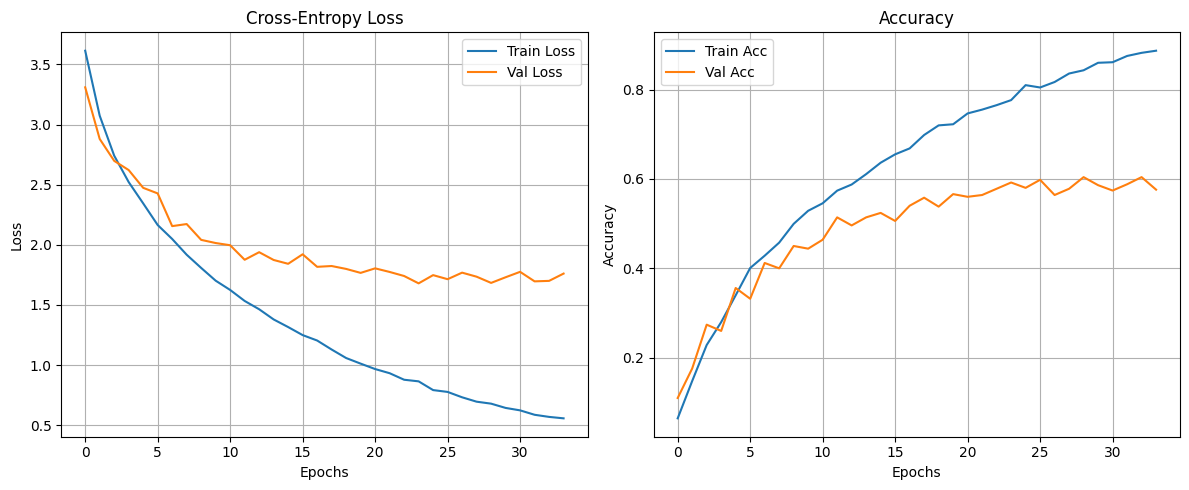

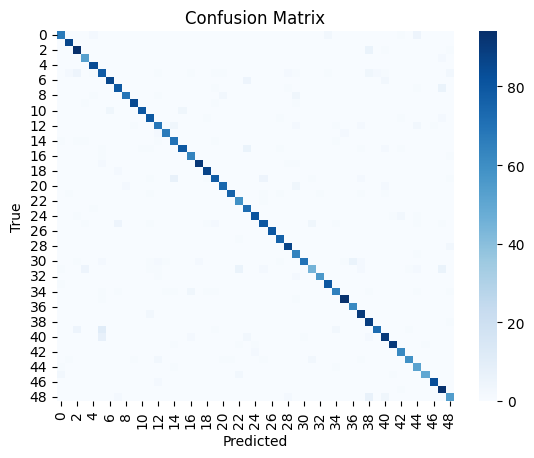

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Prepare your data (assumes X_train, Y_train, X_val, Y_val are numpy arrays)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, Y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, Y_val_tensor), batch_size=64)

# No lo logre con muchas capas y alta cantidad de nodos
# {1000,1000,1000}

input_dim = 784
hidden_dims = [1000,1000,1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    outputs = model(X_train_tensor)
    preds = torch.argmax(outputs, dim=1).numpy()
    y_true = Y_train_tensor.numpy()
    cm = confusion_matrix(y_true, preds)

    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

## Test

## M0

Epoch 0: Train Loss = 4.0162, Val Loss = 3.9867, LR = 0.100000
Epoch 10: Train Loss = 3.7918, Val Loss = 3.8282, LR = 0.100000
Epoch 20: Train Loss = 3.6523, Val Loss = 3.7165, LR = 0.100000
Epoch 30: Train Loss = 3.4931, Val Loss = 3.5805, LR = 0.100000
Epoch 40: Train Loss = 3.3129, Val Loss = 3.4185, LR = 0.100000
Epoch 50: Train Loss = 3.1155, Val Loss = 3.2369, LR = 0.100000
Epoch 60: Train Loss = 2.9118, Val Loss = 3.0480, LR = 0.100000
Epoch 70: Train Loss = 2.7126, Val Loss = 2.8639, LR = 0.100000
Epoch 80: Train Loss = 2.5283, Val Loss = 2.6981, LR = 0.100000
Epoch 90: Train Loss = 2.3651, Val Loss = 2.5529, LR = 0.100000
Epoch 100: Train Loss = 2.2222, Val Loss = 2.4280, LR = 0.100000
Epoch 110: Train Loss = 2.0973, Val Loss = 2.3235, LR = 0.100000
Epoch 120: Train Loss = 1.9882, Val Loss = 2.2340, LR = 0.100000
Epoch 130: Train Loss = 1.8924, Val Loss = 2.1583, LR = 0.100000
Epoch 140: Train Loss = 1.8085, Val Loss = 2.0933, LR = 0.100000
Epoch 150: Train Loss = 1.7340, Val 

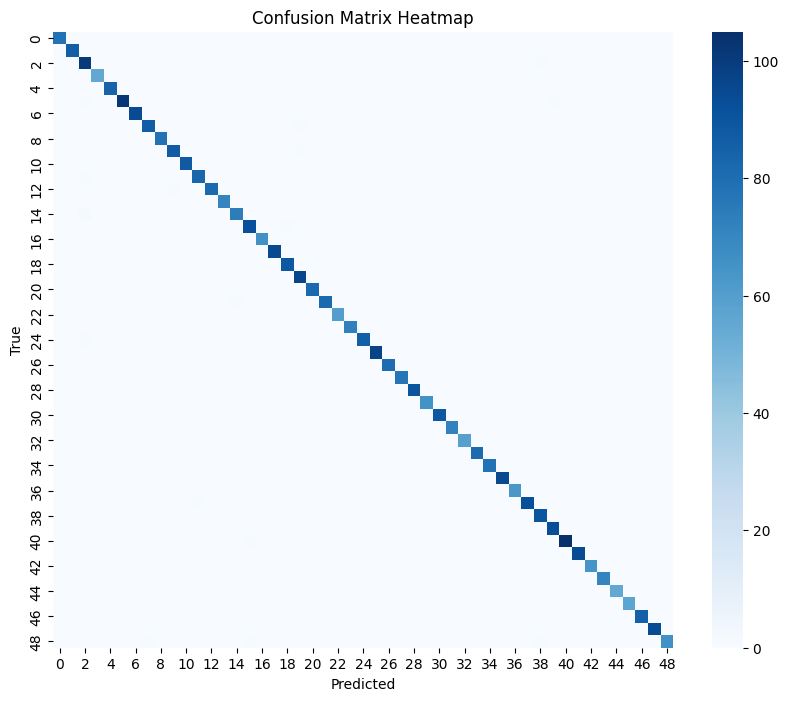


Evaluación en Test:
Accuracy: 0.6500, Loss: 1.8968


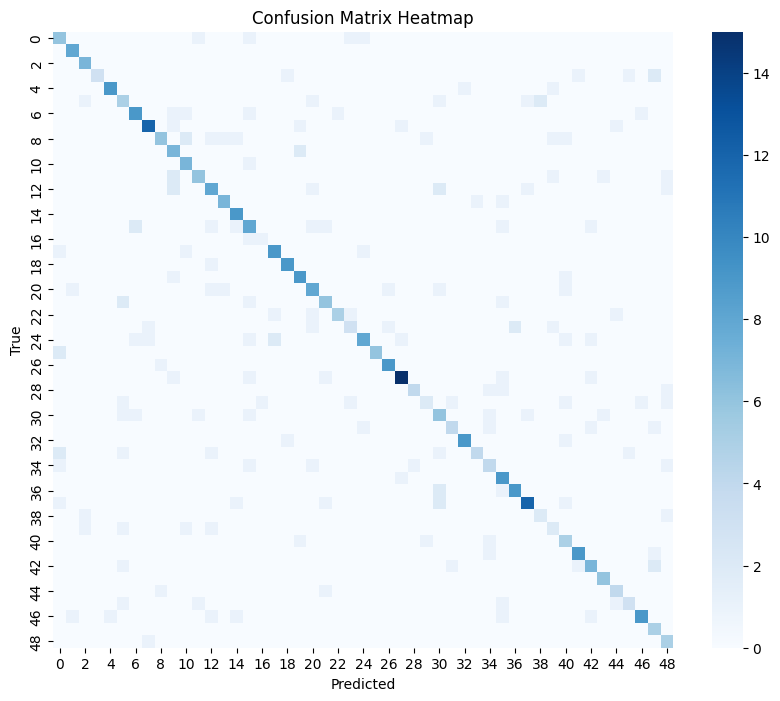

In [16]:
input_size = 784  # Number of features
hidden_layers = [100, 80]  # Two hidden layers
output_size = 49  # 49 classes
learning_rate = 0.01
epochs = 100
num_classes = 49

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Test:")
acc_test_M0, loss_test_M0, conf_test_M0 = nn.evaluate(X_test, Y_test)
print(f"Accuracy: {acc_test_M0:.4f}, Loss: {loss_test_M0:.4f}")
nn.plot_confusion_matrix(conf_test_M0)


## M1

Epoch 0: Train Loss = 2.1198, Val Loss = 2.3450, LR = 0.001000
Epoch 10: Train Loss = 0.0625, Val Loss = 1.5690, LR = 0.000817

Early stopping at epoch 16 (no improvement in 10 epochs).

Tiempo total de entrenamiento: 12.91 segundos
Evaluación en Train:
Accuracy: 0.9998, Loss: 0.0190


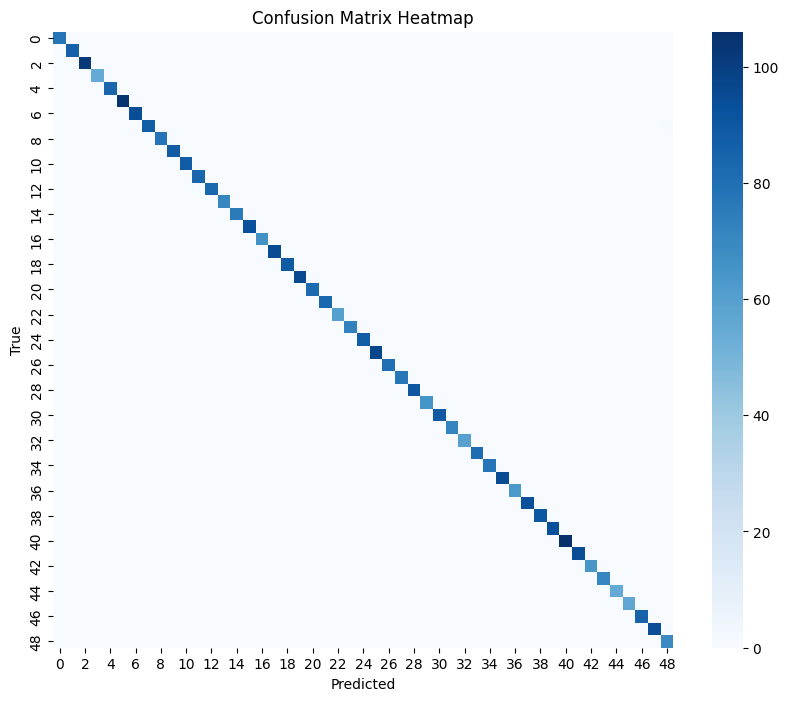


Evaluación en Test:
Accuracy: 0.6680, Loss: 1.7046


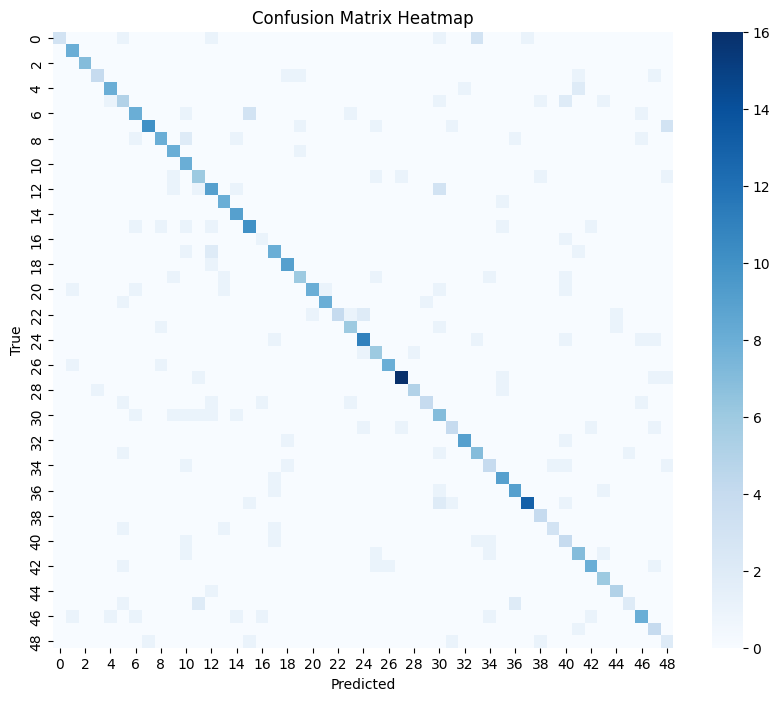

In [52]:
nn = NeuralNetwork(layer_dims=[784, 400, 100, 80, 49], learning_rate=0.001,schedule='exponential',optimizer='adam',gamma_decay= 0.98, use_mini_batch=True,l2_lambda=0.01,batch_size=64)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=300, early_stopping=True, patience=10,  min_delta=1e-3)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Test:")
acc_test_M1, loss_test_M1, conf_test_M1 = nn.evaluate(X_test, Y_test) 
print(f"Accuracy: {acc_test_M1:.4f}, Loss: {loss_test_M1:.4f}")
nn.plot_confusion_matrix(conf_test_M1)

## M2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = 784
hidden_dims = [400, 100, 80]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)  # Exponential decays

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")
    

def evaluate_model(model, test_loader, criterion):
    model.eval()  # set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # no gradient tracking
        for X_batch, Y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            total_loss += loss.item() * X_batch.size(0)  # accumulate total loss

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == Y_batch).sum().item()
            total += Y_batch.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total

    return avg_loss, accuracy

loss_test_M2, acc_test_M2 = evaluate_model(model, test_loader, criterion)
print(f"\nTest Loss: {loss_test_M2:.4f}, Test Accuracy: {acc_test_M2:.4f}")

Epoch 1: Train Loss=3.7735, Acc=0.0480 | Val Loss=3.5276, Acc=0.0980 | LR=0.000980
Epoch 2: Train Loss=3.2252, Acc=0.1452 | Val Loss=3.0055, Acc=0.2040 | LR=0.000960
Epoch 3: Train Loss=2.8249, Acc=0.2517 | Val Loss=2.7025, Acc=0.3020 | LR=0.000941
Epoch 4: Train Loss=2.6034, Acc=0.3020 | Val Loss=2.5554, Acc=0.3660 | LR=0.000922
Epoch 5: Train Loss=2.4795, Acc=0.3310 | Val Loss=2.4852, Acc=0.3620 | LR=0.000904
Epoch 6: Train Loss=2.3929, Acc=0.3640 | Val Loss=2.4417, Acc=0.3660 | LR=0.000886
Epoch 7: Train Loss=2.3012, Acc=0.3905 | Val Loss=2.2952, Acc=0.4120 | LR=0.000868
Epoch 8: Train Loss=2.2143, Acc=0.4095 | Val Loss=2.3292, Acc=0.3760 | LR=0.000851
Epoch 9: Train Loss=2.1334, Acc=0.4260 | Val Loss=2.2262, Acc=0.3960 | LR=0.000834
Epoch 10: Train Loss=2.0343, Acc=0.4535 | Val Loss=2.1727, Acc=0.4280 | LR=0.000817
Epoch 11: Train Loss=1.9870, Acc=0.4642 | Val Loss=2.0790, Acc=0.4440 | LR=0.000801
Epoch 12: Train Loss=1.8998, Acc=0.4888 | Val Loss=2.1312, Acc=0.4240 | LR=0.000785
E

## M3

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = 784
hidden_dims = [2000, 1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")
    

def evaluate_model(model, test_loader, criterion):
    model.eval()  # set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # no gradient tracking
        for X_batch, Y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            total_loss += loss.item() * X_batch.size(0)  # accumulate total loss

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == Y_batch).sum().item()
            total += Y_batch.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total

    return avg_loss, accuracy

loss_test_M3, acc_test_M3 = evaluate_model(model, test_loader, criterion)
print(f"\nTest Loss: {loss_test_M3:.4f}, Test Accuracy: {acc_test_M3:.4f}")

Epoch 1: Train Loss=2.9394, Acc=0.2555 | Val Loss=2.2456, Acc=0.4220 | LR=0.000980
Epoch 2: Train Loss=2.0761, Acc=0.4637 | Val Loss=1.9350, Acc=0.4840 | LR=0.000960
Epoch 3: Train Loss=1.8020, Acc=0.5393 | Val Loss=1.9126, Acc=0.4900 | LR=0.000941
Epoch 4: Train Loss=1.6854, Acc=0.5655 | Val Loss=1.7985, Acc=0.5340 | LR=0.000922
Epoch 5: Train Loss=1.5952, Acc=0.5765 | Val Loss=1.6822, Acc=0.5880 | LR=0.000904
Epoch 6: Train Loss=1.4899, Acc=0.6068 | Val Loss=1.6631, Acc=0.6000 | LR=0.000886
Epoch 7: Train Loss=1.4227, Acc=0.6265 | Val Loss=1.6035, Acc=0.5980 | LR=0.000868
Epoch 8: Train Loss=1.3767, Acc=0.6415 | Val Loss=1.6813, Acc=0.5660 | LR=0.000851
Epoch 9: Train Loss=1.3273, Acc=0.6512 | Val Loss=1.6327, Acc=0.5920 | LR=0.000834
Epoch 10: Train Loss=1.2832, Acc=0.6677 | Val Loss=1.5023, Acc=0.6380 | LR=0.000817
Epoch 11: Train Loss=1.2336, Acc=0.6713 | Val Loss=1.5631, Acc=0.6080 | LR=0.000801
Epoch 12: Train Loss=1.2019, Acc=0.6857 | Val Loss=1.5730, Acc=0.6160 | LR=0.000785
E

## M4

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = 784
hidden_dims = [1000, 1000, 1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")
    

def evaluate_model(model, test_loader, criterion):
    model.eval()  # set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # no gradient tracking
        for X_batch, Y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            total_loss += loss.item() * X_batch.size(0)  # accumulate total loss

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == Y_batch).sum().item()
            total += Y_batch.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total

    return avg_loss, accuracy

loss_test_M4, acc_test_M4 = evaluate_model(model, test_loader, criterion)
print(f"\nTest Loss: {loss_test_M4:.4f}, Test Accuracy: {acc_test_M4:.4f}")

Epoch 1: Train Loss=3.6077, Acc=0.0602 | Val Loss=3.2830, Acc=0.1260 | LR=0.000980
Epoch 2: Train Loss=2.9872, Acc=0.1718 | Val Loss=2.7571, Acc=0.2480 | LR=0.000960
Epoch 3: Train Loss=2.5870, Acc=0.2840 | Val Loss=2.4642, Acc=0.3260 | LR=0.000941
Epoch 4: Train Loss=2.3881, Acc=0.3365 | Val Loss=2.4056, Acc=0.3440 | LR=0.000922
Epoch 5: Train Loss=2.2413, Acc=0.3748 | Val Loss=2.2726, Acc=0.3720 | LR=0.000904
Epoch 6: Train Loss=2.1256, Acc=0.4093 | Val Loss=2.2290, Acc=0.4140 | LR=0.000886
Epoch 7: Train Loss=1.9873, Acc=0.4460 | Val Loss=2.1756, Acc=0.4060 | LR=0.000868
Epoch 8: Train Loss=1.8697, Acc=0.4778 | Val Loss=1.9979, Acc=0.4560 | LR=0.000851
Epoch 9: Train Loss=1.7570, Acc=0.5035 | Val Loss=2.0317, Acc=0.4580 | LR=0.000834
Epoch 10: Train Loss=1.6787, Acc=0.5208 | Val Loss=1.9751, Acc=0.4800 | LR=0.000817
Epoch 11: Train Loss=1.5951, Acc=0.5487 | Val Loss=2.0065, Acc=0.4780 | LR=0.000801
Epoch 12: Train Loss=1.5103, Acc=0.5793 | Val Loss=1.9784, Acc=0.4900 | LR=0.000785
E

## 5

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)
    
# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long) 

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long) 

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)


input_dim = 784
hidden_dims = [2000, 1000]
output_dim = 49

model = Net(input_dim, hidden_dims, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Exponential decay

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * Y_batch.size(0)
        correct += (outputs.argmax(1) == Y_batch).sum().item()
        total += Y_batch.size(0)

    train_loss = total_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            val_loss += loss.item() * Y_batch.size(0)
            val_correct += (outputs.argmax(1) == Y_batch).sum().item()
            val_total += Y_batch.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step()

    # Early stopping check
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        epochs_no_improve = 0
        best_model_state = model.state_dict()  # save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

    print(f"Epoch {epoch+1}: "
          f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f} | "
          f"LR={scheduler.get_last_lr()[0]:.6f}")


X_comp = np.load ("data/X_COMP.npy")
X_comp_norm = X_comp / 255
X_comp_tensor = torch.tensor(X_comp_norm, dtype=torch.float32)
# Make sure the model is in evaluation mode
model.eval()

# === 3. Calcular las probabilidades a posteriori ===
with torch.no_grad():
    logits = model(X_comp_tensor)
    posterior_probs = F.softmax(logits, dim=1)  # (N_samples, N_classes)

# === 4. Guardar el resultado en un CSV ===
print(posterior_probs)
posterior_probs_np = posterior_probs.numpy()
df = pd.DataFrame(posterior_probs_np, columns=[f"Clase_{i}" for i in range(posterior_probs_np.shape[1])])
df.to_csv("Gremes_Ignacio_predicciones.csv", index=False)

Epoch 1: Train Loss=2.9374, Acc=0.2807 | Val Loss=2.2355, Acc=0.4260 | LR=0.000950
Epoch 2: Train Loss=1.9907, Acc=0.4930 | Val Loss=1.9898, Acc=0.4900 | LR=0.000902
Epoch 3: Train Loss=1.7505, Acc=0.5490 | Val Loss=1.8220, Acc=0.5040 | LR=0.000857
Epoch 4: Train Loss=1.6138, Acc=0.5847 | Val Loss=1.7024, Acc=0.5760 | LR=0.000815
Epoch 5: Train Loss=1.5355, Acc=0.5972 | Val Loss=1.6908, Acc=0.5860 | LR=0.000774
Epoch 6: Train Loss=1.4594, Acc=0.6118 | Val Loss=1.6333, Acc=0.5840 | LR=0.000735
Epoch 7: Train Loss=1.4043, Acc=0.6330 | Val Loss=1.5840, Acc=0.6080 | LR=0.000698
Epoch 8: Train Loss=1.3319, Acc=0.6637 | Val Loss=1.6580, Acc=0.5880 | LR=0.000663
Epoch 9: Train Loss=1.2975, Acc=0.6630 | Val Loss=1.5184, Acc=0.6160 | LR=0.000630
Epoch 10: Train Loss=1.2496, Acc=0.6735 | Val Loss=1.5304, Acc=0.6100 | LR=0.000599
Epoch 11: Train Loss=1.1956, Acc=0.6920 | Val Loss=1.4974, Acc=0.6320 | LR=0.000569
Epoch 12: Train Loss=1.1580, Acc=0.7143 | Val Loss=1.5202, Acc=0.6080 | LR=0.000540
E